In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
os.listdir(
    Path.cwd() / 'egs_cost_data'
)

['egs_costs_s_72_2015.csv',
 'egs_costs_s_72_2020.csv',
 'egs_costs_s_72_2025.csv',
 'egs_costs_s_72_2030.csv',
 'egs_costs_s_72_2035.csv',
 'egs_costs_s_72_2040.csv',
 'egs_costs_s_72_2045.csv',
 'egs_costs_s_72_2050.csv']

In [71]:
idx = pd.IndexSlice

gt = pd.read_csv(
    Path.cwd().parent.parent.parent /
    'cluster_data' /
    'breyer_sweep' /
    'joint_data' /
    'nodal_geothermal_stats.csv',
    header=[0,1,2,3,4,5,6,7,8],
    index_col=[0,1]
)

gt.columns = gt.columns.droplevel([0,1,2,3,7,8])
gt = gt.loc[:, idx[:, 'elec', 'static']]
gt.columns = gt.columns.get_level_values(0)


gt.index.get_level_values(1).unique()

gt = gt.loc[idx[:, 'geothermal heat elec'], :]
gt.index = gt.index.get_level_values(0)
gt = gt > 1

In [72]:
gt

egs_capex,2020,2025,2030,2035,2040,2045,2050
location,,,,,,,
AL1 0,False,False,False,False,False,False,False
AT1 0,False,False,False,True,True,True,True
BA1 0,False,False,False,False,False,False,False
BE1 0,False,False,False,False,True,True,True
BG1 0,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
RS1 0,False,False,False,False,False,True,True
SE2 0,False,False,False,False,False,False,False
SE2 1,False,False,False,False,False,False,False


In [60]:
gt.index

MultiIndex([('AL1 0',        'AC_geothermal_generation'),
            ('AL1 0',  'AC_geothermal_generation_share'),
            ('AL1 0',               'AC_marginal_price'),
            ('AL1 0',             'AC_total_generation'),
            ('AL1 0',                             'dac'),
            ('AL1 0',        'geothermal heat chp elec'),
            ('AL1 0',              'geothermal heat dh'),
            ('AL1 0',            'geothermal heat elec'),
            ('AL1 0',                      'offwind-ac'),
            ('AL1 0',                          'onwind'),
            ...
            ('SK1 0',                             'dac'),
            ('SK1 0',        'geothermal heat chp elec'),
            ('SK1 0',              'geothermal heat dh'),
            ('SK1 0',            'geothermal heat elec'),
            ('SK1 0',                          'onwind'),
            ('SK1 0',                           'solar'),
            ('SK1 0',       'uch_geothermal_generation')

In [ ]:
import seaborn as sns


,egs_capex,2020,2025,2030,2035,2040,2045,2050
location,,,,,,,,
AL1 0,geothermal heat elec,0.000405,0.000365,0.000300,0.000354,0.000375,0.000283,0.000343
AT1 0,geothermal heat elec,0.000542,0.000791,0.001616,13170.922926,18136.168475,19961.090103,25615.306585
BA1 0,geothermal heat elec,0.000421,0.000430,0.000372,0.000486,0.000675,0.000642,0.000776
BE1 0,geothermal heat elec,0.000449,0.000501,0.000499,0.000971,57.416504,7777.096642,10788.535053
BG1 0,geothermal heat elec,0.000445,0.000479,0.000467,0.000799,0.002446,0.009567,0.011308
...,...,...,...,...,...,...,...,...
RS1 0,geothermal heat elec,0.000450,0.000489,0.000487,0.000869,0.002370,575.392586,2303.770451
SE2 0,geothermal heat elec,0.000424,0.000426,0.000375,0.000528,0.000731,0.000721,0.001109
SE2 1,geothermal heat elec,0.000423,0.000430,0.000376,0.000524,0.000716,0.000657,0.001013


In [ ]:
gt = pd

In [99]:
ngcc_ccs_capex_lower = 2_300_000 / 1.1 # dollar to euro
ngcc_ccs_capex_higher = 3_200_000 / 1.1 

ngcc_ccs_lifetime = 30
ngcc_ccs_efficiency = 0.42

gas_price = 30 # EUR/MWh

ngcc_ccs_capacity_factor = 0.2

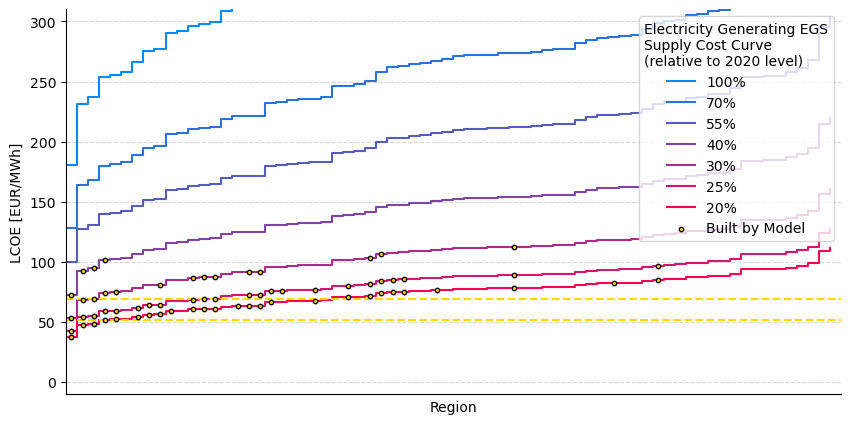

In [100]:
fig, ax = plt.subplots(figsize=(10, 5))

for year, pct in [(2020, '100%'), (2025, '70%'), (2030, '55%'), (2035, '40%'), 
                  (2040, '30%'), (2045, '25%'), (2050, '20%')]:

    c = pd.read_csv(
        Path.cwd() / 'egs_cost_data' / f'egs_costs_s_72_{year}.csv'
    ).set_index('name').dropna()['capex_mean'].sort_values() * 1000

    gt = gt.loc[c.index]

    lt = 25
    dr = 0.07
    eta = 0.97
    eta_el = 0.12

    orc_cost_th = 1500 * 1000 * eta_el

    annuity_factor = dr * (1 + dr) ** lt / ((1 + dr) ** lt - 1)

    lcoe = (c * annuity_factor / eta_el + annuity_factor * orc_cost_th) / eta / 8760
    lcoe = (c + eta_el * orc_cost_th) * annuity_factor / (eta * 8760 * eta_el)

    x = np.arange(len(lcoe))

    # Interpolate between #008bfa (start) and #ff0051 (end)
    fraction = (year - 2020) / (2050 - 2020)
    r = int(0x00 + (0xff - 0x00) * fraction)
    g = int(0x8b + (0x00 - 0x8b) * fraction) 
    b = int(0xfa + (0x51 - 0xfa) * fraction)
    color = f'#{r:02x}{g:02x}{b:02x}'

    ax.step(x, lcoe.values, where='post', label=pct, color=color)
    
    # Add golden scatter points where gt is True for this year
    mask = gt[str(year)]
    if year == 2050:  # Only add to legend once
        ax.scatter(x[mask] + 0.5, lcoe[mask], color='gold', zorder=3, s=10, edgecolors='black', label='Built by Model')
    else:
        ax.scatter(x[mask] + 0.5, lcoe[mask], color='gold', zorder=3, s=10, edgecolors='black')

    annuity_factor = dr * (1 + dr) ** ngcc_ccs_lifetime / ((1 + dr) ** ngcc_ccs_lifetime - 1)
    
    ax.set_xlabel('Region')
    ax.set_ylabel('LCOE [EUR/MWh]')
    ax.legend(loc='upper right', title='Electricity Generating EGS\nSupply Cost Curve\n(relative to 2020 level)')


lcoe_gas_lower = (
    ngcc_ccs_capex_lower * annuity_factor +
    gas_price * ngcc_ccs_efficiency * ngcc_ccs_capacity_factor * 8760
) / ngcc_ccs_efficiency / 8760
ax.axhline(lcoe_gas_lower, color='gold', linestyle='--', label='Gas')

lcoe_gas_higher = (
    ngcc_ccs_capex_higher * annuity_factor +
    gas_price * ngcc_ccs_efficiency * ngcc_ccs_capacity_factor * 8760
) / ngcc_ccs_efficiency / 8760
ax.axhline(lcoe_gas_higher, color='gold', linestyle='--', label='Gas')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks([])
ax.grid(True, axis='y', linestyle='--', alpha=0.5)
ax.set_axisbelow(True)

ax.set_ylim(-10, 310)
ax.set_xlim(0, len(lcoe))
plt.show()